In [4]:
import pandas as pd
import numpy as np
import yfinance as yf

df = yf.download(["MSFT", "KO", "TSLA"], start="2015-01-01")
df = df["Adj Close"]
ret_df = df.pct_change().dropna()

[*********************100%%**********************]  3 of 3 completed


In [5]:
def give_weights():
    rand = np.random.random(len(df.columns))
    rand /= rand.sum()
    return rand

In [6]:
pf_exp, pf_stds, weights = [], [], []

# 252 average trade days per year

for i in range(2000):
    W = give_weights()
    weights.append(W)
    pf_exp.append(W.dot(ret_df.mean()) * 252)
    pf_stds.append(W.dot(ret_df.cov().dot(W)) * 252)

In [7]:
tog = pd.DataFrame({ "pf_exp": pf_exp, "pf_stds": pf_stds, "weights": weights })

<Axes: xlabel='pf_stds', ylabel='pf_exp'>

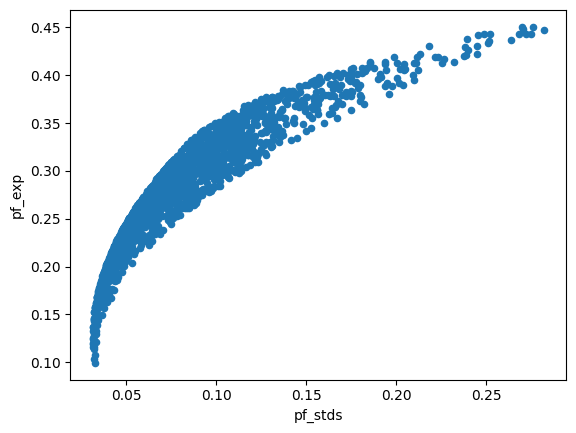

In [8]:
tog.plot(x="pf_stds", y="pf_exp", kind="scatter")

In [9]:
sharpes = tog.pf_exp / tog.pf_stds

In [10]:
sharpes

0       4.857707
1       2.393221
2       4.057549
3       3.741017
4       4.772233
          ...   
1995    4.186887
1996    3.513183
1997    5.066091
1998    3.570708
1999    4.222691
Length: 2000, dtype: float64

In [12]:
tog.loc[sharpes.nlargest(1).index]

,pf_exp,pf_stds,weights
870,0.202484,0.039171,"[0.5160113268686121, 0.3855064704221246, 0.098..."


In [13]:
ret_df

,KO,MSFT,TSLA
Date,,,
2015-01-05,0.000000,-0.009196,-0.042041
2015-01-06,0.007593,-0.014677,0.005664
2015-01-07,0.012482,0.012705,-0.001562
2015-01-08,0.012096,0.029418,-0.001564
2015-01-09,-0.011032,-0.008405,-0.018802
...,...,...,...
2023-11-16,-0.001049,0.017583,-0.038091
2023-11-17,0.001925,-0.016801,0.003040
2023-11-20,0.002445,0.020522,0.005548


In [14]:
tog.nsmallest(1, "pf_stds")

,pf_exp,pf_stds,weights
1793,0.120574,0.031451,"[0.8363671354884231, 0.15409727489593963, 0.00..."
